# Box-Cox transformation Demo
Using Random data, we generate a polynomial dataset with $x \in [0.1 , 10]$. 
Using the boxcox R function, we estimate the best box cox transform to get a straight data set. 

With the  `?boxcox` command you will see what other parameters you can give the boxcox function. 
More information about Box-Cox transforms by Peng-Fei Li: https://www.ime.usp.br/~abe/lista/pdfm9cJKUmFZp.pdf
The original script (without randomization) can be found at https://www.statology.org/box-cox-transformation-in-r/

In [1]:
require(MASS)
#require(ggplot2)

Loading required package: MASS



In [2]:
#?runif
#?rdisc
n = 1000
r = rnorm(1,2,2)
x=runif(n,0.1,10)
y = 20+ x^r *(1+ rnorm(n,0,.3))
print(paste("polynomial: y = 20 +x^" , round(r,4), "+eps"))

[1] "polynomial: y = 20 +x^ 3.2825 +eps"


[1] 0.03030303

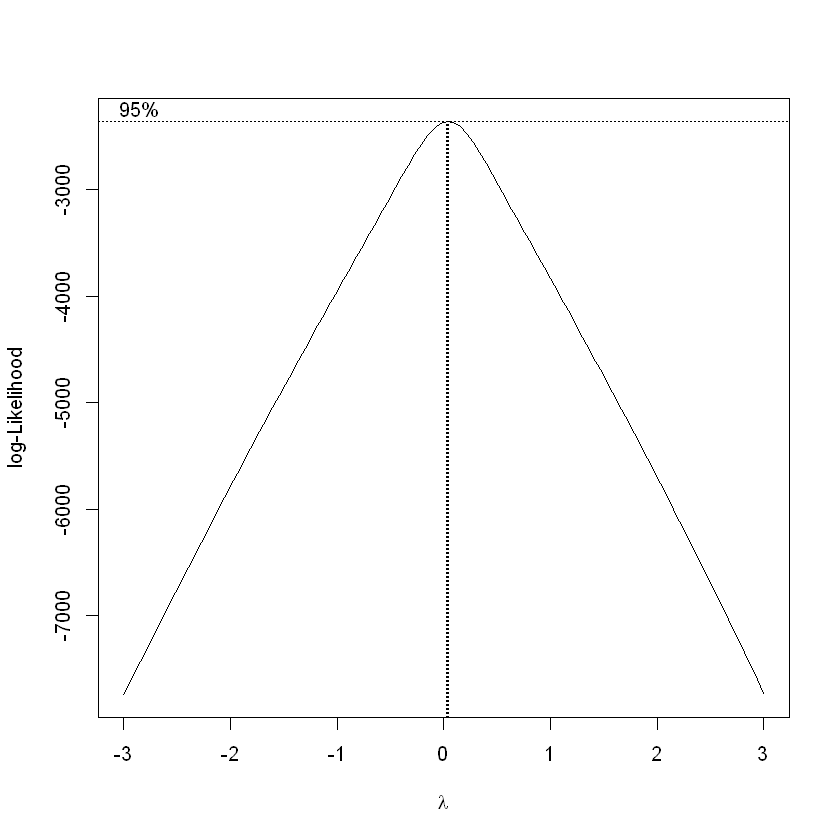

In [3]:
#find optimal lambda for Box-Cox transformation 
bc <- boxcox(y ~ x, lambda = seq(-3,3,0.1))
(lambda <- bc$x[which.max(bc$y)])
#fit new linear regression model using the Box-Cox transformation
new_model <- lm(((y^lambda-1)/lambda) ~ x)

### Fit linear regression models

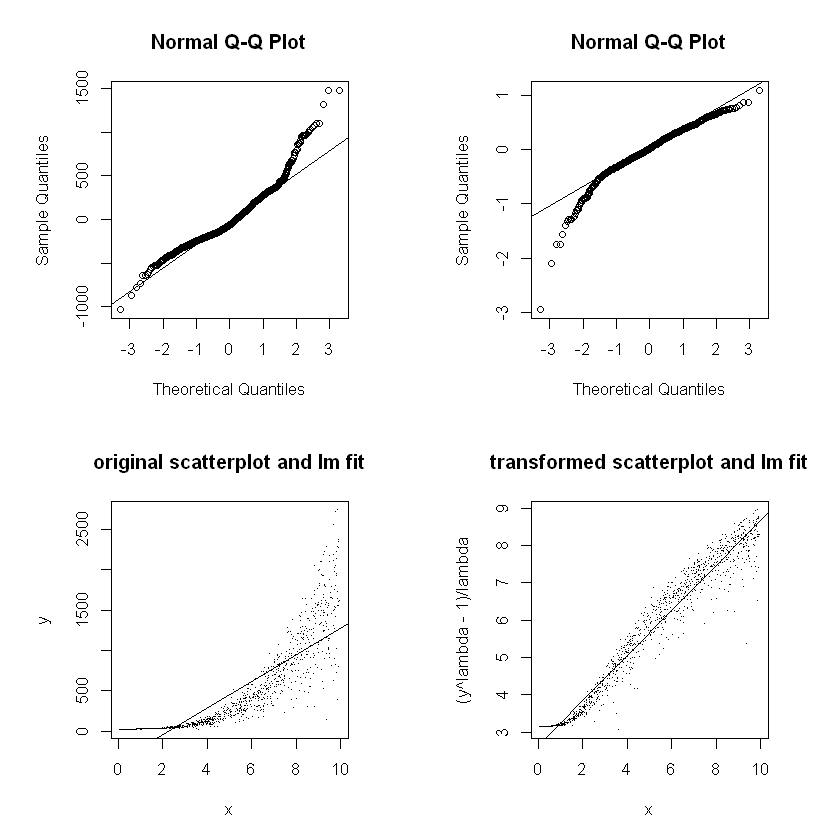

In [4]:
model <- lm(y~x)
#fit new linear regression model using the Box-Cox transformation
new_model <- lm(((y^lambda-1)/lambda) ~ x)
#define plotting area
op <- par(pty = "s", mfrow = c(2, 2))

#Q-Q plot for original model
qqnorm(model$residuals)
qqline(model$residuals)

#Q-Q plot for Box-Cox transformed model
qqnorm(new_model$residuals)
qqline(new_model$residuals)
plot(x,y,pch = ".")#, col = c(50,50,50,alpha = .9))
title("original scatterplot and lm fit")
abline(model)
plot(x, (y^lambda-1)/lambda, pch = ".") #, col =c(50,50,50,alpha = .5))
title("transformed scatterplot and lm fit")
abline(new_model)
#display all 4 plots
par(op)

If we are lucky (with the random exponent), the transformed data shows a much straighter QQ plot, showing that the residuals are more normally distributed, and the right hand side scatterplot has a more equal variation and is straighter around the line. 

If the exponent is larger than 1, it works well. if the exponent is 03 or -3, it doesnt work well, i.e. the QQ plot on the right hand side shows no less deviation from a straight line than the untransformed one on the LHS, and the Regression fit plot on the RHS shows the transformed data is not better fitted to a straight line than the untransformed data on the LHS.  
Run the above cells a few times to convince yourself of this. 

### A summary of estimations of the original and transformed models:

In [5]:
summary(model)
summary(new_model)


Call:
lm(formula = y ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-1030.85  -193.99   -59.35   168.24  1478.38 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -374.698     19.524  -19.19   <2e-16 ***
x            165.093      3.269   50.51   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 295.9 on 998 degrees of freedom
Multiple R-squared:  0.7188,	Adjusted R-squared:  0.7185 
F-statistic:  2551 on 1 and 998 DF,  p-value: < 2.2e-16



Call:
lm(formula = ((y^lambda - 1)/lambda) ~ x)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.94638 -0.21152  0.02314  0.27037  1.08483 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.629055   0.025881   101.6   <2e-16 ***
x           0.604870   0.004333   139.6   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.3922 on 998 degrees of freedom
Multiple R-squared:  0.9513,	Adjusted R-squared:  0.9512 
F-statistic: 1.949e+04 on 1 and 998 DF,  p-value: < 2.2e-16


## Other data distributions

### Poisson distributed data: (e.g. # of potholes in a km of road)

Loading required package: purrr

z = Poisson(t)+.01  
   ( +.01 to be positive: Box Cox transforms only work for positive variables)

best exponent seems to be

0.575757575757576



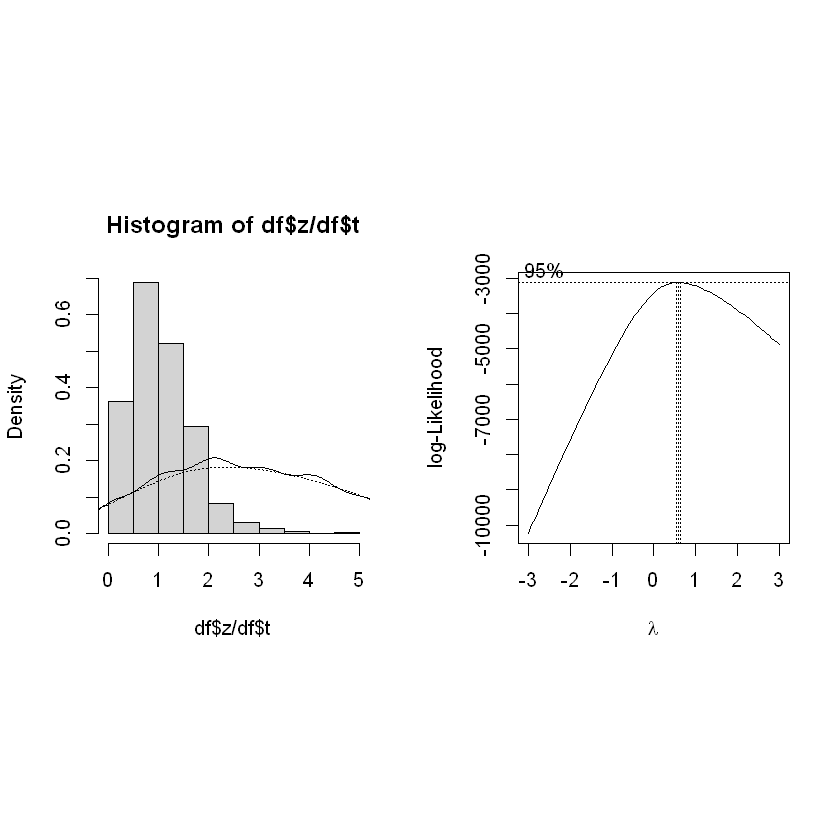

In [6]:
#find optimal lambda for Box-Cox transformation of Poisson data
require(purrr)
m <- runif(1,0.1,10)
df <- data.frame( t=seq(from=1, to = 5, length.out= n))
df$z <- map_dbl(df$t, {function(t) { rpois(1,t) +.1} })
op <- par(pty = "s", mfrow = c(1, 2))  #2 plots side by side
hist(df$z/df$t,prob =T)
lines(density(df$z))
lines(density(df$z, adjust=2), lty="dotted")
message(paste("z = Poisson(t)+.01  
   ( +.01 to be positive: Box Cox transforms only work for positive variables)"))
#print(bcz)
bcz <- boxcox(df$z ~ df$t, lambda = seq(-3,3,0.1))
lambdaz <- bcz$x[which.max(bcz$y)]
message('best exponent seems to be' )
message(lambdaz)
par(op)

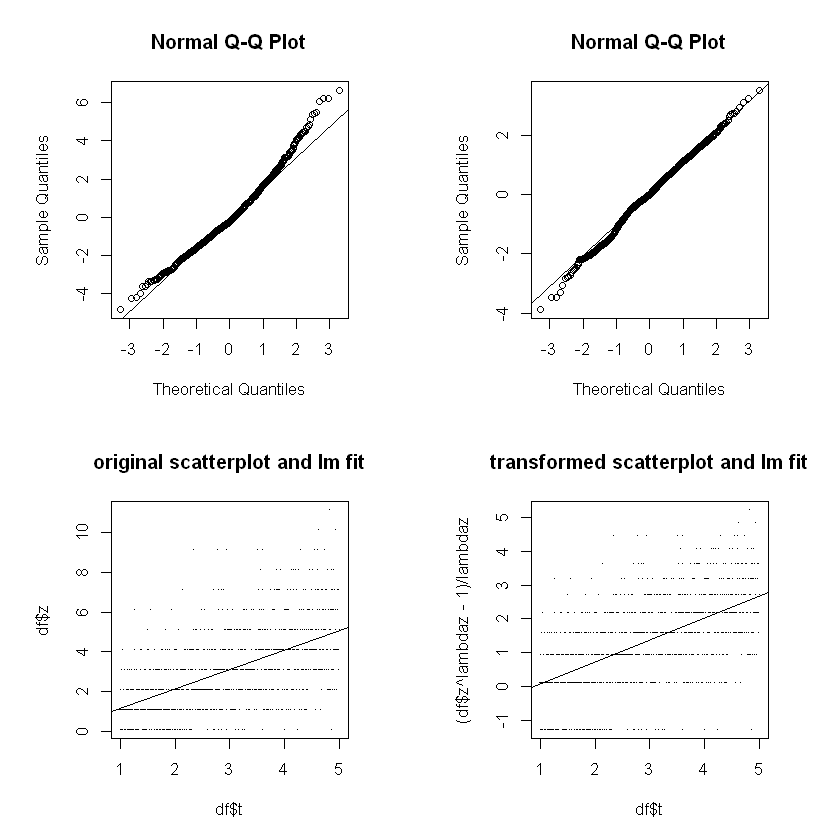

In [7]:
modelz <- lm(df$z ~ df$t)
#fit new linear regression model using the Box-Cox transformation
#print( (df$z^lambdaz-1)/lambdaz)

new_modelz <- lm(((df$z^lambdaz-1)/lambdaz) ~ df$t)

#define plotting area
op <- par(pty = "s", mfrow = c(2, 2))

#Q-Q plot for original model
qqnorm(modelz$residuals)
qqline(modelz$residuals)

#Q-Q plot for Box-Cox transformed model
qqnorm(new_modelz$residuals)
qqline(new_modelz$residuals)
plot(df$t,df$z,pch = ".")
title("original scatterplot and lm fit")
abline(modelz)
plot(df$t, (df$z^lambdaz-1)/lambdaz,pch = ".")
title("transformed scatterplot and lm fit")
abline(new_modelz)
#display all 4 plots
par(op)

In [8]:
summary(modelz)
summary(new_modelz)


Call:
lm(formula = df$z ~ df$t)

Residuals:
    Min      1Q  Median      3Q     Max 
-4.8255 -1.1669 -0.1931  0.9992  6.6384 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.17430    0.14846   1.174    0.241    
df$t         0.97523    0.04618  21.118   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.688 on 998 degrees of freedom
Multiple R-squared:  0.3089,	Adjusted R-squared:  0.3082 
F-statistic:   446 on 1 and 998 DF,  p-value: < 2.2e-16



Call:
lm(formula = ((df$z^lambdaz - 1)/lambdaz) ~ df$t)

Residuals:
    Min      1Q  Median      3Q     Max 
-3.8821 -0.6634 -0.0008  0.7448  3.5017 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.57819    0.09750   -5.93 4.17e-09 ***
df$t         0.65371    0.03033   21.55  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.109 on 998 degrees of freedom
Multiple R-squared:  0.3177,	Adjusted R-squared:  0.317 
F-statistic: 464.6 on 1 and 998 DF,  p-value: < 2.2e-16


### Exponentially distributed data (# of km between potholes on road)

e = exp(t)+.01  
   ( +.01 to be positive: Box Cox transforms only work for positive variables)

best exponent seems to be

0.151515151515151



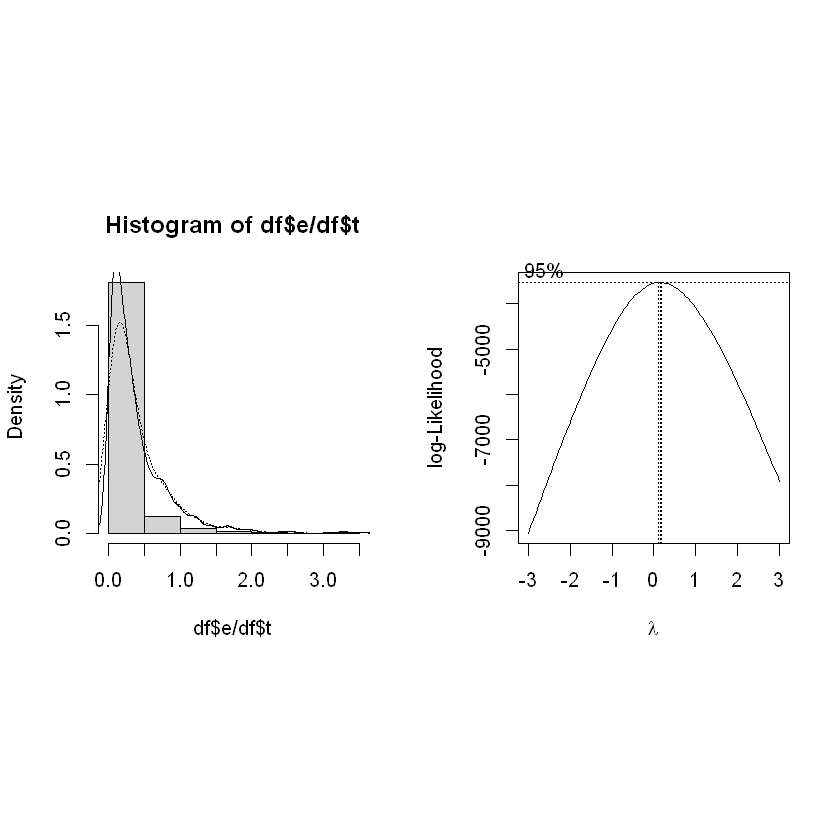

In [9]:
#find optimal lambda for Box-Cox transformation of exponential data


df$e <- map_dbl(df$t, {function(t) { rexp(1,t) +.01} })
op <- par(pty = "s", mfrow = c(1, 2))
hist(df$e/df$t,prob =T)
lines(density(df$e))
lines(density(df$e, adjust=2), lty="dotted")
message(paste("e = exp(t)+.01  
   ( +.01 to be positive: Box Cox transforms only work for positive variables)"))

bce <- boxcox(df$e ~ df$t, lambda = seq(-3,3,0.1))
lambdae <- bce$x[which.max(bce$y)]
message('best exponent seems to be' )
message(lambdae)
par(op)

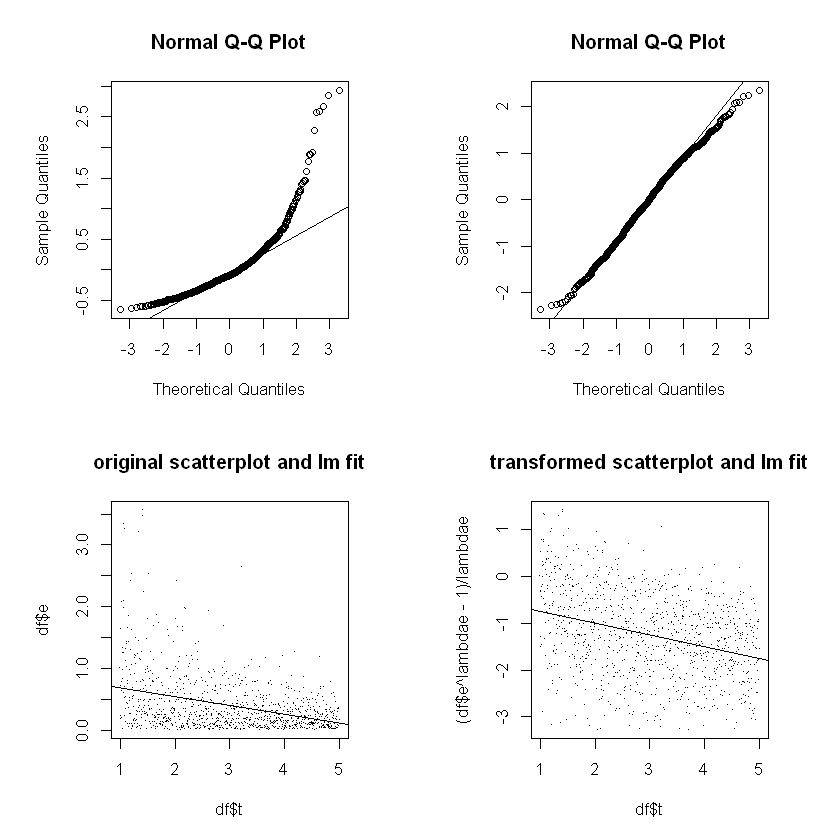

In [10]:
modele <- lm(df$e ~ df$t)
#fit new linear regression model using the Box-Cox transformation

new_modele <- lm(((df$e^lambdae-1)/lambdae) ~ df$t)

#define plotting area
op <- par(pty = "s", mfrow = c(2, 2))

#Q-Q plot for original model
qqnorm(modele$residuals)
qqline(modele$residuals)

#Q-Q plot for Box-Cox transformed model
qqnorm(new_modele$residuals)
qqline(new_modele$residuals)
plot(df$t,df$e,pch = ".")
title("original scatterplot and lm fit")
abline(modele)
plot(df$t, (df$e^lambdae-1)/lambdae,pch = ".")
title("transformed scatterplot and lm fit")
abline(new_modele)
#display all 4 plots
par(op)

In [11]:
summary(modele)
summary(new_modele)


Call:
lm(formula = df$e ~ df$t)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.65482 -0.26422 -0.09163  0.14814  2.93445 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  0.82477    0.03764   21.91   <2e-16 ***
df$t        -0.14172    0.01171  -12.11   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.4279 on 998 degrees of freedom
Multiple R-squared:  0.128,	Adjusted R-squared:  0.1272 
F-statistic: 146.6 on 1 and 998 DF,  p-value: < 2.2e-16



Call:
lm(formula = ((df$e^lambdae - 1)/lambdae) ~ df$t)

Residuals:
    Min      1Q  Median      3Q     Max 
-2.3630 -0.5742  0.0215  0.6319  2.3565 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.49374    0.07554  -6.536 1.01e-10 ***
df$t        -0.25260    0.02350 -10.750  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.8589 on 998 degrees of freedom
Multiple R-squared:  0.1038,	Adjusted R-squared:  0.1029 
F-statistic: 115.6 on 1 and 998 DF,  p-value: < 2.2e-16
